# NMF Practical Work

**Roland Badeau - Notebook code by Umut Simsekli**

Telecom Paris - TSIA 206

## 1. By following the technique that we used in the lecture, derive the MUR algorithm by yourselves

In [42]:
%matplotlib inline

In [43]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


<ipython-input-44-54c2439844a5>:18: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(X)), origin="lower")


<Figure size 640x480 with 0 Axes>

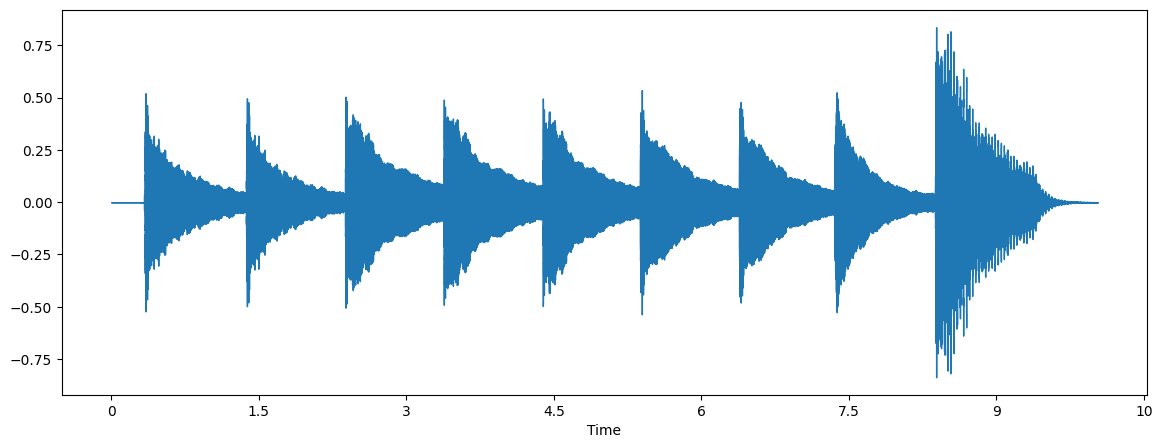

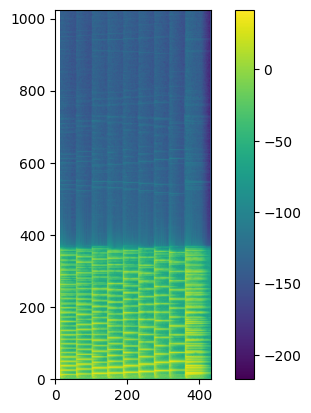

In [44]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(20*np.log10(np.abs(X)), origin="lower")
plt.colorbar()


In [62]:
ipd.Audio(y,rate=sr)

We have :
$\frac{{\partial \delta_{\beta}}}{{\partial W}} = 0 - \frac{(\beta-1)X (WH)^{\beta-2}H^T}{\beta-1} + \frac{\beta (WH)^{\beta-1}H^T}{\beta}$
$ = - X (WH)^{\beta-2}H^T + (WH)^{\beta-1}H^T $


Let's make a gradient descent and chose the learning rate : $\eta_W = \frac{W}{(WH)^{\beta-1}H^T}$,

We then have:

$$ W_{k+1} = W_k - \frac{W_k}{(W_kH_k)^{\beta-1}H_k^T}( - X (W_kH_k)^{\beta-2}H_k^T + (W_kH_k)^{\beta-1}H_k^T) $$
$$ W_{k+1} = W_k  \frac{X\hat{X}^{\beta-2}H_k^T}{\hat{X}^{\beta-1}H_k^T} $$

Now we do the same for H, with the leaning rate $\eta_H = \frac{H}{W^T(WH)^{\beta-1}} $,

Then we obtain:

$$ H_{k+1} = H_k - \frac{H_k}{W_k^T(W_kH_k)^{\beta-1}} ( -W_k^T (X(W_kH_k)^{\beta-2}) + W_k^T(W_kH_k)^{\beta-1}) $$
$$ H_{k+1} = H_k\frac{W_k^T (X\hat{X}^{\beta-2})}{W_k^T \hat{X}^{\beta-1}}  $$

## 2. Implement MUR for NMF with beta-divergence

In [45]:
epsi = 10**(-5)


def mur_update(W,H,X,beta):

  X_hat = W@H
  tmp = X * np.power(X_hat+1e-6, beta-2)
  tmp = tmp @ H.T
  tmp = tmp / (np.power(X_hat+1e-6, beta-1)@ H.T)
  W_next = W * tmp

  X_hat = W_next @ H
  tmp = X * np.power(X_hat+1e-6, beta-2)
  tmp = W.T @ tmp
  tmp = tmp / (W_next.T @ np.power(X_hat+1e-6, beta-1))
  H_next = H * tmp
  return W_next,H_next



def mur(X,k,beta,n_iterations):
  i,j = X.shape
  W = np.random.rand(i,k)
  H = np.random.rand(k,j)
  for _ in range(n_iterations):
    W,H=mur_update(W,H,X,beta)
  return W,H


## 3. Experiment with the algorithm parameters, such as $\beta$, number of columns in $W$, STFT window size, hop size, etc.

In [46]:
beta_array = [1,2,5]
k_array = [2,4,6,8,10,20]

In [57]:
#SFTF hop size = 256 beta = 2 k = 2

Xstft_256 = librosa.stft(y, n_fft=2048, hop_length=256, win_length=None)
X_256 = np.abs(Xstft_256)

W,H = mur(X_256,2,2,100)


X_hat = W @ H

X1_hat = X_256 * (W[:,0:1] @ H[0:1,:]) / (W @ H + epsi)

X2_hat = X_256 * (W[:,1:2] @ H[1:2,:]) / (W @ H + epsi)


In [58]:
y_hat = librosa.istft(X_hat,hop_length = 256,win_length = None)
ipd.Audio(y_hat,rate=sr)

In [59]:
y1_hat = librosa.istft(X1_hat,hop_length = 256,win_length = None)
ipd.Audio(y1_hat,rate=sr)

In [60]:
y2_hat = librosa.istft(X2_hat,hop_length = 256,win_length = None)
ipd.Audio(y2_hat,rate=sr)

The quality is really bad, let's change the parameters

In [64]:
#SFTF hop size = 256 beta = 2 k = 20

Xstft_2 = librosa.stft(y, n_fft=2048, hop_length=256, win_length=None)
X_2 = np.abs(Xstft_2)

W,H = mur(X_2,20,2,100)


X_hat = W @ H

In [65]:
y_hat = librosa.istft(X_hat,hop_length = 256,win_length = None)
ipd.Audio(y_hat,rate=sr)

The reconstruction is better, but there is 8 notes, so we if k>8, we wil not be able to reconsctruct them

In [66]:
#SFTF hop size = 256 beta = 10 k = 5

Xstft_2 = librosa.stft(y, n_fft=2048, hop_length=256, win_length=None)
X_2 = np.abs(Xstft_2)

W,H = mur(X_2,5,10,100)


X_hat = W @ H

In [71]:
y_hat = librosa.istft(X_hat,hop_length = 256,win_length = None)
ipd.Audio(y_hat,rate=sr)

The reconstruction is bad and we have an echo, so beta shouldnt be high

In [68]:
#SFTF hop size = 256 beta = 0.5 k = 5

Xstft_2 = librosa.stft(y, n_fft=2048, hop_length=256, win_length=None)
X_2 = np.abs(Xstft_2)

W,H = mur(X_2,5,0.5,100)


X_hat = W @ H

In [69]:
y_hat = librosa.istft(X_hat,hop_length = 256,win_length = None)
ipd.Audio(y_hat,rate=sr)

The reconstruction is bad, so beta shouldnt be to small

## 4. Reconstruct each musical note separately

We will use beta=2 and k=8

In [88]:

Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

W,H = mur(X,8,2,100)


X_hat = W @ H

L=[]

for i in range(8):
  L.append(X * (W[:,i:i+1] @ H[i:i+1,:]) / (W @ H + epsi))




In [89]:
y1_hat = librosa.istft(L[0],hop_length = 512,win_length = None)
ipd.Audio(y1_hat, rate=sr)


In [90]:
y2_hat = librosa.istft(L[1],hop_length = 512,win_length = None)
ipd.Audio(y2_hat, rate=sr)

Each musical note looks separate

<ipython-input-91-37bff933f1b4>:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(x)), origin="lower")


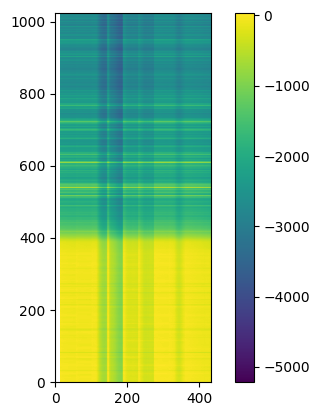

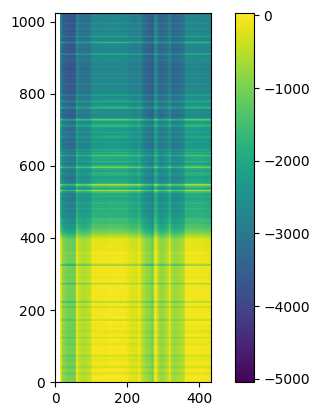

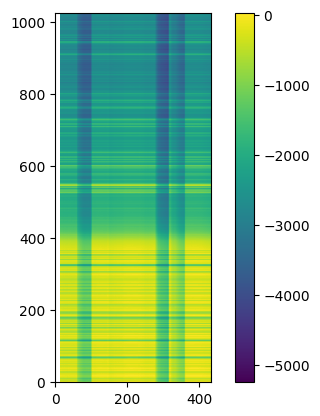

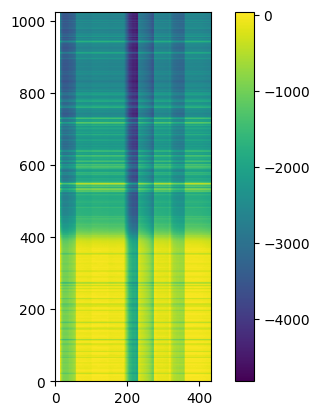

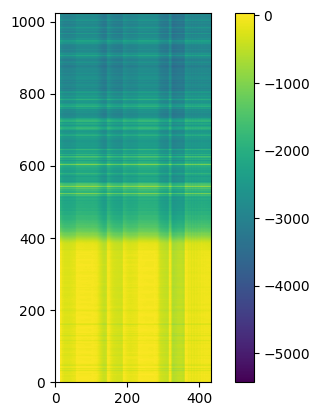

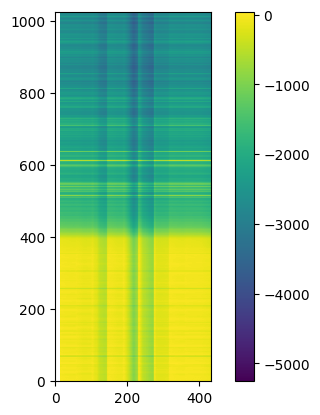

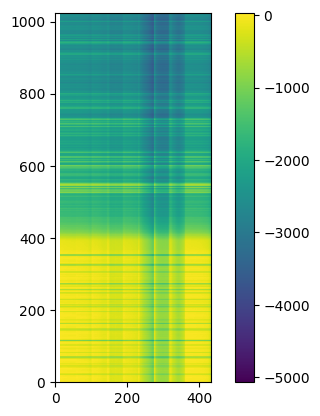

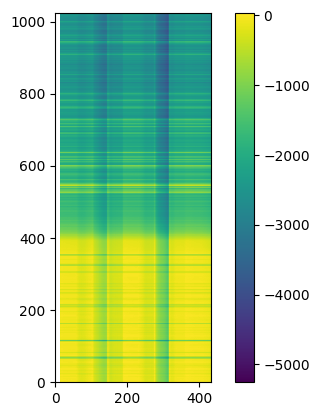

In [91]:
L_fft=[]
for x in L:
  plt.imshow(20*np.log10(np.abs(x)), origin="lower")
  plt.colorbar()
  plt.show()


Finally, it dosent really look great.